In [2]:
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv("./Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
data['Genre'] = label_encoder.fit_transform(data['Genre'])

scaler = StandardScaler()
data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

print(data.head())

   CustomerID  Genre       Age  Annual Income (k$)  Spending Score (1-100)
0           1      1 -1.424569           -1.738999               -0.434801
1           2      1 -1.281035           -1.738999                1.195704
2           3      0 -1.352802           -1.700830               -1.715913
3           4      0 -1.137502           -1.700830                1.040418
4           5      0 -0.563369           -1.662660               -0.395980


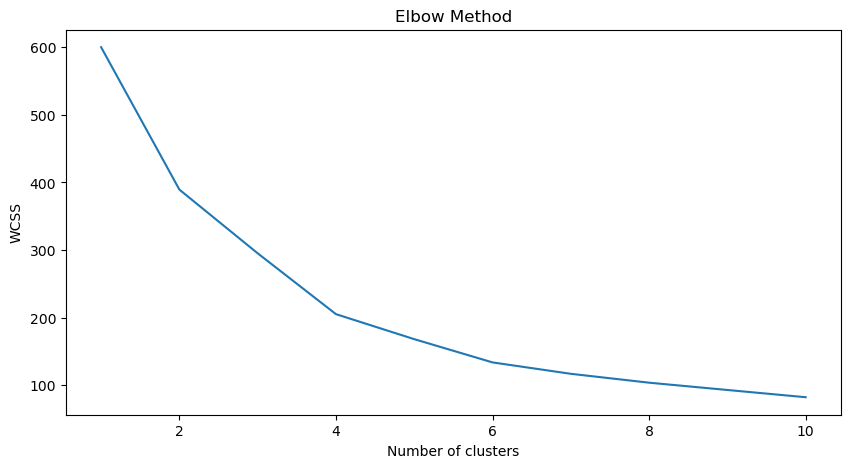

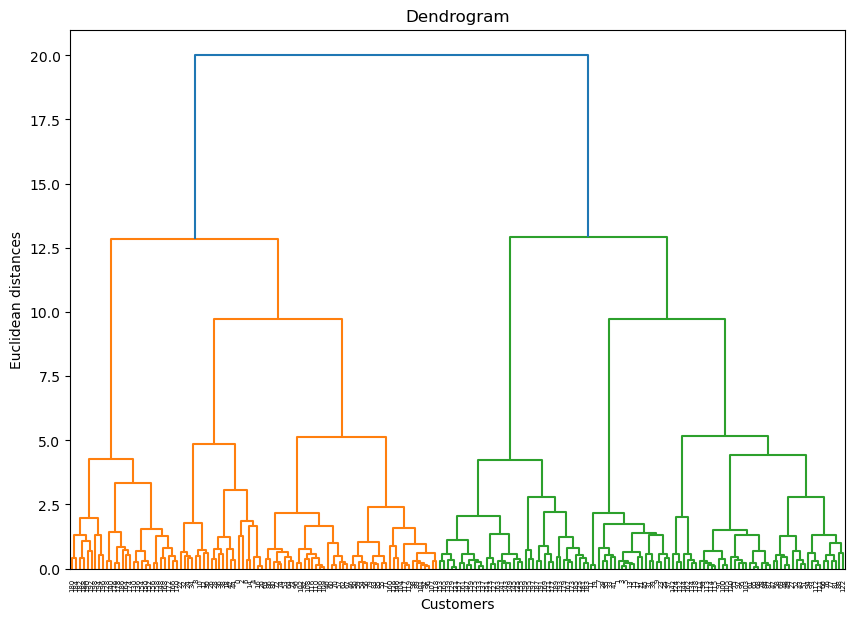

Davies-Bouldin Index (KMeans)- 0.874551051002418
Davies-Bouldin Index (Hierarchical)- 0.9162886109753661
Davies-Bouldin Index (DBSCAN)- 1.7569458461701164
Calinski-Harabasz Index (KMeans)- 125.10094020060954
Calinski-Harabasz Index (Hierarchical)- 107.82656032570374
Calinski-Harabasz Index (DBSCAN)- 34.07053246361936


In [8]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

optimal_clusters = 5 
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

hc = AgglomerativeClustering(n_clusters=optimal_clusters, metric='euclidean', linkage='ward')
data['Hierarchical_Cluster'] = hc.fit_predict(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

dbscan = DBSCAN(eps=0.5, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

dbi_kmeans = davies_bouldin_score(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], data['KMeans_Cluster'])
dbi_hierarchical = davies_bouldin_score(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], data['Hierarchical_Cluster'])
dbi_dbscan = davies_bouldin_score(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], data['DBSCAN_Cluster'])

ch_kmeans = calinski_harabasz_score(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], data['KMeans_Cluster'])
ch_hierarchical = calinski_harabasz_score(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], data['Hierarchical_Cluster'])
ch_dbscan = calinski_harabasz_score(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], data['DBSCAN_Cluster'])

print(f'Davies-Bouldin Index (KMeans)- {dbi_kmeans}')
print(f'Davies-Bouldin Index (Hierarchical)- {dbi_hierarchical}')
print(f'Davies-Bouldin Index (DBSCAN)- {dbi_dbscan}')
print(f'Calinski-Harabasz Index (KMeans)- {ch_kmeans}')
print(f'Calinski-Harabasz Index (Hierarchical)- {ch_hierarchical}')
print(f'Calinski-Harabasz Index (DBSCAN)- {ch_dbscan}')

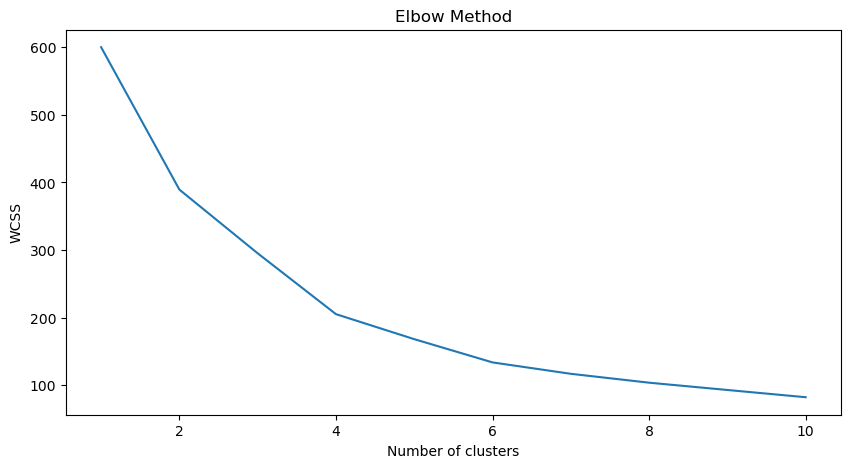

In [9]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

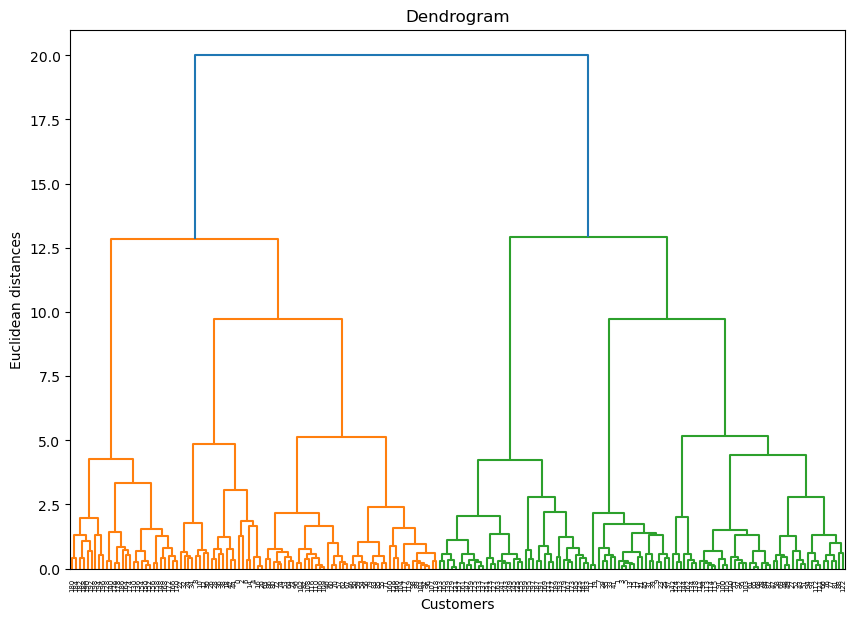

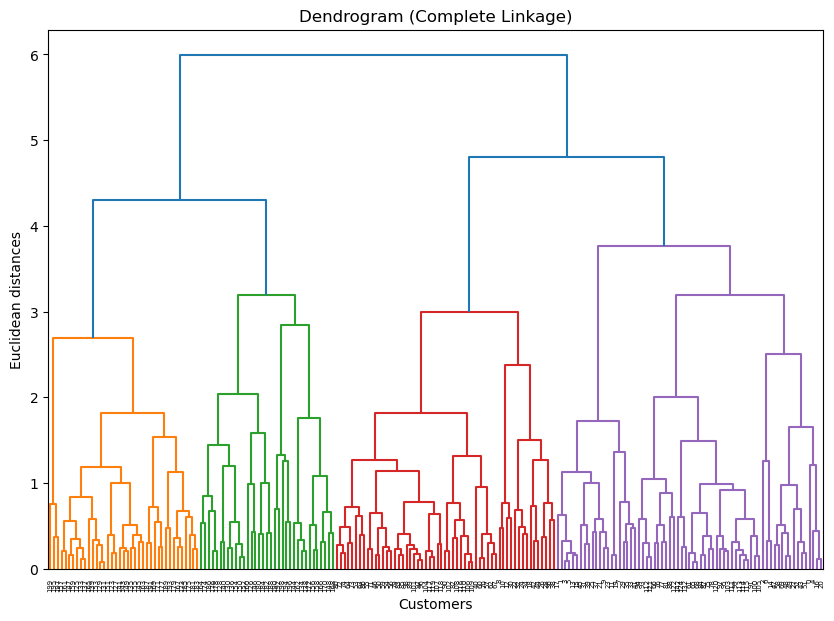

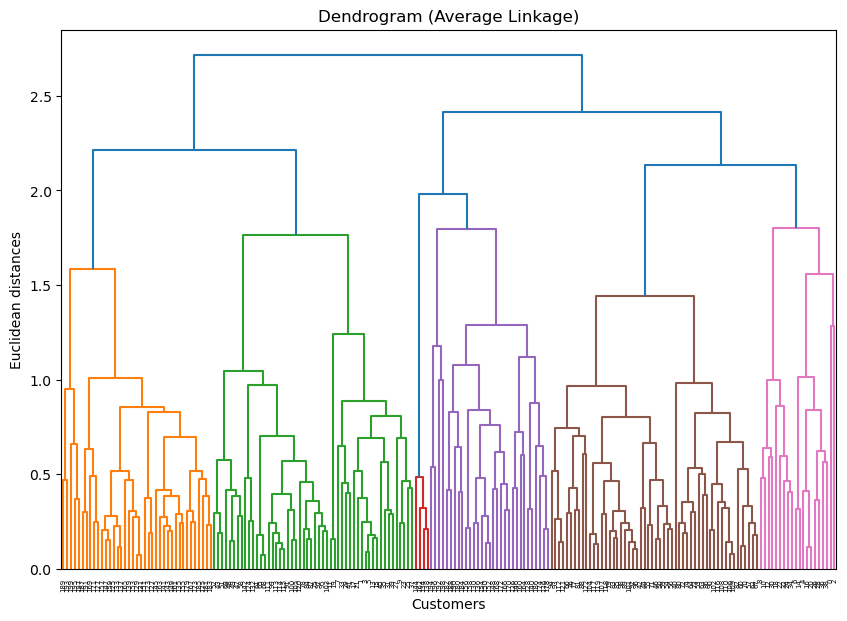

In [10]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
data['Hierarchical_Cluster'] = hc.fit_predict(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], method='complete'))
plt.title('Dendrogram (Complete Linkage)')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], method='average'))
plt.title('Dendrogram (Average Linkage)')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

eps: 0.3, min_samples: 3, clusters: 12, noise points: 103
eps: 0.3, min_samples: 4, clusters: 7, noise points: 121
eps: 0.3, min_samples: 5, clusters: 10, noise points: 134
eps: 0.3, min_samples: 6, clusters: 5, noise points: 164
eps: 0.3, min_samples: 7, clusters: 1, noise points: 190
eps: 0.4, min_samples: 3, clusters: 10, noise points: 59
eps: 0.4, min_samples: 4, clusters: 8, noise points: 73
eps: 0.4, min_samples: 5, clusters: 6, noise points: 98
eps: 0.4, min_samples: 6, clusters: 6, noise points: 110
eps: 0.4, min_samples: 7, clusters: 5, noise points: 129
eps: 0.5, min_samples: 3, clusters: 8, noise points: 32
eps: 0.5, min_samples: 4, clusters: 8, noise points: 39
eps: 0.5, min_samples: 5, clusters: 6, noise points: 60
eps: 0.5, min_samples: 6, clusters: 5, noise points: 66
eps: 0.5, min_samples: 7, clusters: 4, noise points: 79
eps: 0.6, min_samples: 3, clusters: 3, noise points: 14
eps: 0.6, min_samples: 4, clusters: 3, noise points: 18
eps: 0.6, min_samples: 5, clusters: 2,

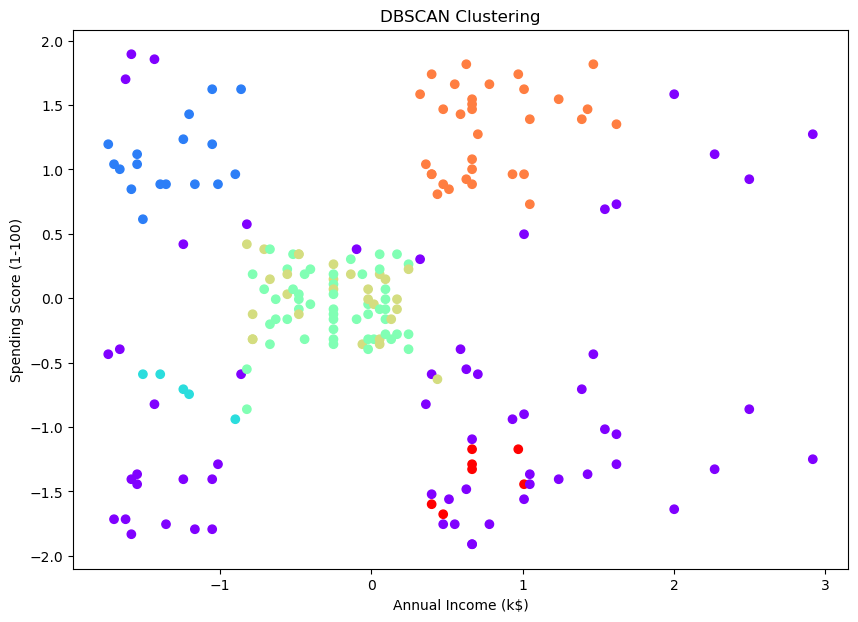

In [11]:
from sklearn.cluster import DBSCAN
import numpy as np

eps_values = [0.3, 0.4, 0.5, 0.6, 0.7]
min_samples_values = [3, 4, 5, 6, 7]

dbscan_results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        dbscan_results.append((eps, min_samples, n_clusters, n_noise))

for result in dbscan_results:
    print(f'eps: {result[0]}, min_samples: {result[1]}, clusters: {result[2]}, noise points: {result[3]}')

best_eps = 0.5
best_min_samples = 5

dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
data['DBSCAN_Cluster'] = dbscan.fit_predict(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

plt.figure(figsize=(10, 7))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['DBSCAN_Cluster'], cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [12]:
from sklearn.metrics import davies_bouldin_score
from scipy.spatial.distance import pdist, cdist
import numpy as np

def dunn_index(X, labels):
    unique_labels = np.unique(labels)
    clusters = [X[labels == label] for label in unique_labels]
    
    intra_dists = [np.max(pdist(cluster)) for cluster in clusters]
    inter_dists = [np.min(cdist(clusters[i], clusters[j])) for i in range(len(clusters)) for j in range(i+1, len(clusters))]
    
    return np.min(inter_dists) / np.max(intra_dists)

dbi_kmeans = davies_bouldin_score(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], data['KMeans_Cluster'])
dbi_hierarchical = davies_bouldin_score(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], data['Hierarchical_Cluster'])
dbi_dbscan = davies_bouldin_score(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], data['DBSCAN_Cluster'])

dunn_kmeans = dunn_index(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values, data['KMeans_Cluster'])
dunn_hierarchical = dunn_index(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values, data['Hierarchical_Cluster'])
dunn_dbscan = dunn_index(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values, data['DBSCAN_Cluster'])

print(f'Davies-Bouldin Index (KMeans)- {dbi_kmeans}')
print(f'Davies-Bouldin Index (Hierarchical)- {dbi_hierarchical}')
print(f'Davies-Bouldin Index (DBSCAN)- {dbi_dbscan}')
print(f'Dunn Index (KMeans)- {dunn_kmeans}')
print(f'Dunn Index (Hierarchical)- {dunn_hierarchical}')
print(f'Dunn Index (DBSCAN)- {dunn_dbscan}')

Davies-Bouldin Index (KMeans)- 0.874551051002418
Davies-Bouldin Index (Hierarchical)- 0.9162886109753661
Davies-Bouldin Index (DBSCAN)- 1.7569458461701164
Dunn Index (KMeans)- 0.0659364648066778
Dunn Index (Hierarchical)- 0.05717008013858544
Dunn Index (DBSCAN)- 0.042266353818671366


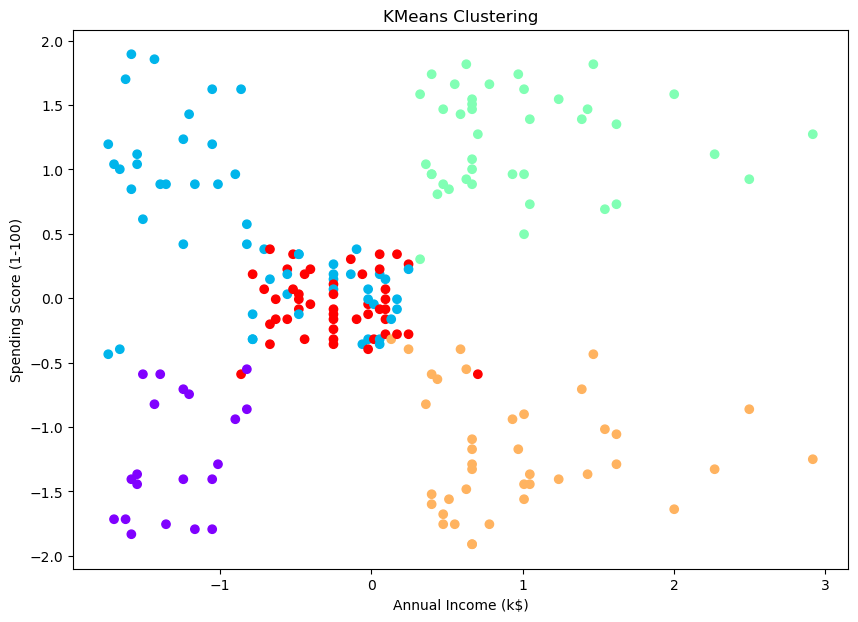

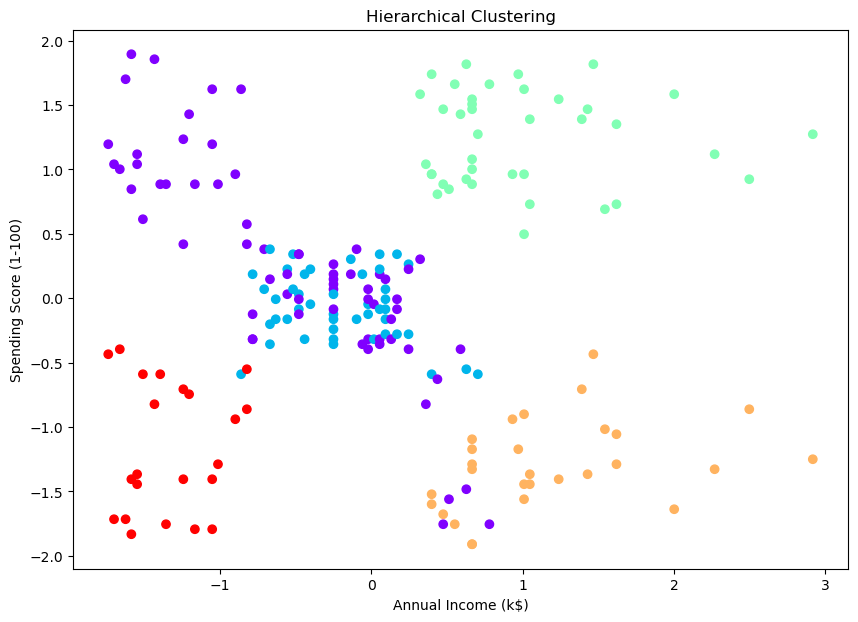

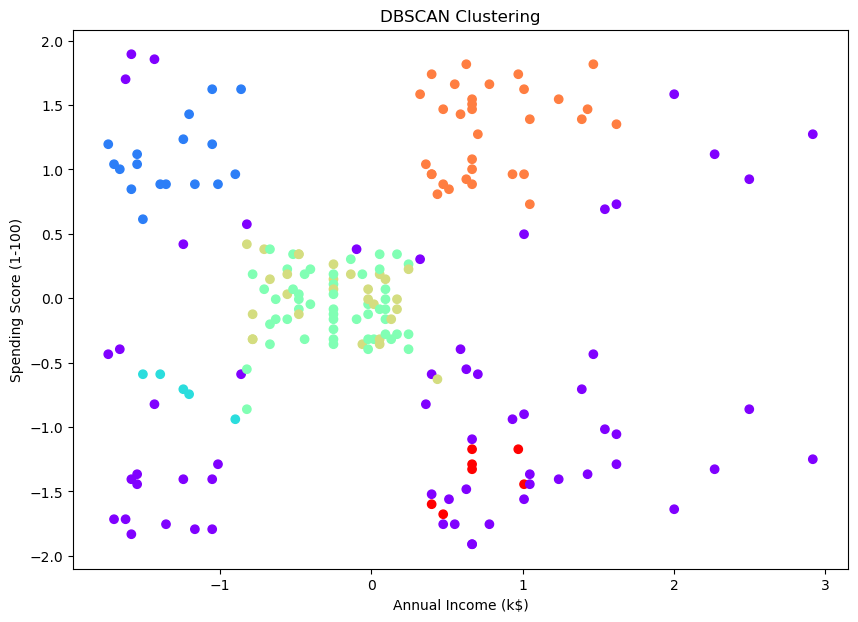

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['KMeans_Cluster'], cmap='rainbow')
plt.title('KMeans Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

plt.figure(figsize=(10, 7))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Hierarchical_Cluster'], cmap='rainbow')
plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

plt.figure(figsize=(10, 7))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['DBSCAN_Cluster'], cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [14]:
kmeans_clusters = data['KMeans_Cluster'].nunique()
hierarchical_clusters = data['Hierarchical_Cluster'].nunique()
dbscan_clusters = data['DBSCAN_Cluster'].nunique()

print(f'Number of clusters (KMeans)- {kmeans_clusters}')
print(f'Number of clusters (Hierarchical)- {hierarchical_clusters}')
print(f'Number of clusters (DBSCAN)- {dbscan_clusters}')

print(f'Davies-Bouldin Index (KMeans)- {dbi_kmeans}')
print(f'Davies-Bouldin Index (Hierarchical)- {dbi_hierarchical}')
print(f'Davies-Bouldin Index (DBSCAN)- {dbi_dbscan}')
print(f'Dunn Index (KMeans)- {dunn_kmeans}')
print(f'Dunn Index (Hierarchical)- {dunn_hierarchical}')
print(f'Dunn Index (DBSCAN)- {dunn_dbscan}')

print("Interpretability-")
print("KMeans- Easy to interpret, clusters are spherical and evenly sized.")
print("Hierarchical- Provides a hierarchy of clusters, useful for understanding the data structure.")
print("DBSCAN- Can find arbitrarily shaped clusters and handle noise, but may be harder to interpret.")

Number of clusters (KMeans)- 5
Number of clusters (Hierarchical)- 5
Number of clusters (DBSCAN)- 7
Davies-Bouldin Index (KMeans)- 0.874551051002418
Davies-Bouldin Index (Hierarchical)- 0.9162886109753661
Davies-Bouldin Index (DBSCAN)- 1.7569458461701164
Dunn Index (KMeans)- 0.0659364648066778
Dunn Index (Hierarchical)- 0.05717008013858544
Dunn Index (DBSCAN)- 0.042266353818671366
Interpretability-
KMeans- Easy to interpret, clusters are spherical and evenly sized.
Hierarchical- Provides a hierarchy of clusters, useful for understanding the data structure.
DBSCAN- Can find arbitrarily shaped clusters and handle noise, but may be harder to interpret.


In [15]:
print("Strengths and Weaknesses of Clustering Techniques:")

print("\nKMeans Clustering:")
print("Strengths:")
print("- Simple and easy to implement.")
print("- Efficient for large datasets.")
print("- Works well with spherical clusters.")
print("Weaknesses:")
print("- Assumes clusters are of similar size and shape.")
print("- Sensitive to initial cluster centroids.")
print("- Requires specifying the number of clusters (k) in advance.")

print("\nHierarchical Clustering:")
print("Strengths:")
print("- Does not require specifying the number of clusters in advance.")
print("- Provides a dendrogram for visualizing the hierarchy of clusters.")
print("- Can capture complex cluster structures.")
print("Weaknesses:")
print("- Computationally expensive for large datasets.")
print("- Sensitive to noise and outliers.")
print("- Difficult to handle large datasets due to high time complexity.")

print("\nDBSCAN Clustering:")
print("Strengths:")
print("- Can find arbitrarily shaped clusters.")
print("- Robust to noise and outliers.")
print("- Does not require specifying the number of clusters in advance.")
print("Weaknesses:")
print("- Sensitive to parameter selection (eps and min_samples).")
print("- Struggles with clusters of varying densities.")
print("- May classify all points as noise if parameters are not well-tuned.")

print("\nImplications of Customer Segmentation in Real-World Business Scenarios:")
print("- Helps in identifying target customer groups for personalized marketing strategies.")
print("- Improves customer satisfaction by addressing specific needs and preferences.")
print("- Enhances resource allocation by focusing on high-value customer segments.")
print("- Aids in product development by understanding customer behavior and preferences.")
print("- Increases overall business efficiency and profitability through targeted efforts.")

Strengths and Weaknesses of Clustering Techniques:

KMeans Clustering:
Strengths:
- Simple and easy to implement.
- Efficient for large datasets.
- Works well with spherical clusters.
Weaknesses:
- Assumes clusters are of similar size and shape.
- Sensitive to initial cluster centroids.
- Requires specifying the number of clusters (k) in advance.

Hierarchical Clustering:
Strengths:
- Does not require specifying the number of clusters in advance.
- Provides a dendrogram for visualizing the hierarchy of clusters.
- Can capture complex cluster structures.
Weaknesses:
- Computationally expensive for large datasets.
- Sensitive to noise and outliers.
- Difficult to handle large datasets due to high time complexity.

DBSCAN Clustering:
Strengths:
- Can find arbitrarily shaped clusters.
- Robust to noise and outliers.
- Does not require specifying the number of clusters in advance.
Weaknesses:
- Sensitive to parameter selection (eps and min_samples).
- Struggles with clusters of varying dens